In [111]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#tp = plot_pc_graph_tikz(est_g, [String(k) for k in keys(df)])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.001636388, 0.00041186))

In [112]:
est_g

{5, 7} directed simple Int64 graph

In [5]:
using Plots, GraphRecipes

graphplot(est_g, names= [String(k) for k in keys(df)])

MethodError: MethodError: no method matching keys(::DataFrame)

Closest candidates are:
  keys(!Matched::Cmd)
   @ Base process.jl:678
  keys(!Matched::Pkg.Registry.RegistryInstance)
   @ Pkg ~/.julia/juliaup/julia-1.10.3+0.x64.linux.gnu/share/julia/stdlib/v1.10/Pkg/src/Registry/registry_instance.jl:447
  keys(!Matched::RegexMatch)
   @ Base regex.jl:245
  ...


In [114]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)


(x = [0.06193274031408013, 0.2784058141640002, -0.5958244153640522, 0.04665938957338174, 1.0857940215432762, -1.5765649225859841, 0.1759399913010747, 0.8653808054093252, -2.790281005549307, -1.8920155582259128  …  -1.172869224619136, 0.9218177694319407, -0.46060170839179715, -0.9424506066689221, -0.6683350146660898, 1.13376245295865, 0.16017123470193892, 1.2035494780696616, -0.25218914788914293, 1.121665998910078], v = [-0.09250182220418984, 0.5675980897652538, -0.7140918730993022, -0.13985185939667483, 0.8654191143982632, -1.6179414873956435, 0.5908944698407181, 0.9484675082849228, -2.5323640793803697, -1.7979777572444016  …  -1.0046444212595644, 1.1717910105198648, -0.49022308208890647, -1.5455988844258108, -0.5526962435107993, 1.141418378235226, 0.8364713487518959, 1.1029217963545608, -0.5302228268986705, 1.1264197190628773], w = [0.36578689835494893, 0.8410329130812975, -0.8534652870632888, -0.2624374783168834, 0.8651710876085588, -1.3083709949188083, -0.07268315253075378, 1.250996

In [115]:
est_g, score = ges(df; penalty=1.0, parallel=true)


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.000883324, 9.6681e-5))

In [116]:
print(est_g)

SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])

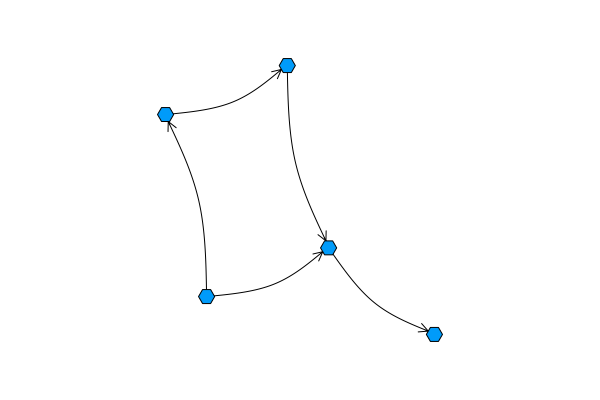

In [117]:
graphplot(pdag2dag!(est_g))

In [118]:
using Random
using CausalInference
using Graphs

# Set the random seed for reproducibility
Random.seed!(1)

# Number of samples
N = 2000

# Generate random variables
x = randn(N)
v = x + randn(N) * 0.25
w = x + randn(N) * 0.25
z = v + w + randn(N) * 0.25
s = z + randn(N) * 0.25

# Create a NamedTuple to represent the DataFrame
df = (x=x, v=v, w=w, z=z, s=s)

# Estimate the graph using GES
est_g, score = ges(df; penalty=1.0, parallel=true)

# Print the estimated graph
println("Estimated Graph:")
println(est_g)

# Extract the adjacency list
adj_list = collect(edges(est_g))

# Function to perform OLS regression
ols(X, y) = inv(X' * X) * X' * y

# Get the list of nodes and their names
nodes = collect(keys(df))

# Perform regressions based on the adjacency list
for node in nodes
    # Get the index of the node
    node_index = findfirst(==(node), nodes)
    
    # Get the parents of the node in the graph
    preds = [e.src for e in adj_list if e.dst == node_index]
    
    # If the node has predecessors, perform regression
    if !isempty(preds)
        # Create the design matrix X with only the parent variables
        X = hcat([df[nodes[pred]] for pred in preds]...)
        y = df[node]
        
        # Perform OLS regression
        coef = ols(X, y)
        
        # Print the coefficients (excluding the intercept)
        println("Coefficients for $node ~ ", join(["$(nodes[pred])" for pred in preds], " + "), ":")
        println(coef)
    end
end


Estimated Graph:
SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


Coefficients for x ~ v + w:
[0.4822865701211789, 0.47915204476827]
Coefficients for v ~ x:
[1.0077634660256916]
Coefficients for w ~ x:
[1.011743622979617]
Coefficients for z ~ v + w:
[0.9830732331777696, 1.005015339335607]
Coefficients for s ~ z:
[1.0051039852425676]


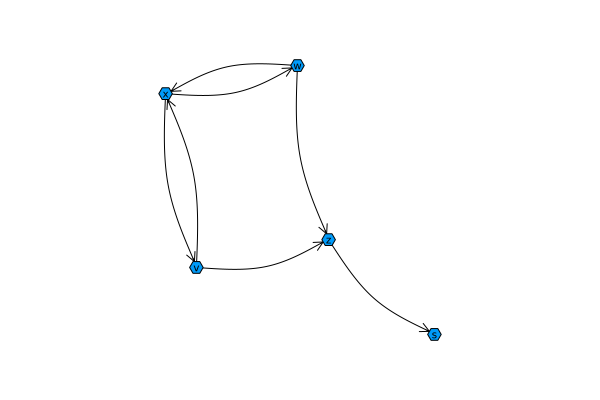

In [119]:
graphplot(est_g, names= [String(k) for k in keys(df)])

## With Actual Data

In [1]:
using HTTP, CSV, DataFrames
using CausalInference
using TikzGraphs
# If you have problems with TikzGraphs.jl, 
# try alternatively plotting backend GraphRecipes.jl + Plots.jl
# and corresponding plotting function `plot_pc_graph_recipes`

url = "https://www.ccd.pitt.edu//wp-content/uploads/files/Retention.txt"

df = DataFrame(CSV.File(HTTP.get(url).body))

# for now, pcalg and fcialg only accepts Float variables...
# this should change soon hopefully
for name in names(df)
	df[!, name] = convert(Array{Float64,1}, df[!,name])
end

# make variable names a bit easier to read
variables = map(x->replace(x,"_"=>" "), names(df))

est_g = pcalg(df, 0.025, gausscitest)

graphplot(est_g, names= variables)

UndefVarError: UndefVarError: `graphplot` not defined

In [136]:
function estimate_equations(df::DataFrame, est_g::SimpleDiGraph):: Dict{Symbol, Dict{String, Vector{Union{String, AbstractFloat}}}}
    
    if !(all(occursin(r"^[A-Za-z_][A-Za-z0-9_]*$", string(name)) for name in names(df)))
        rename!(df, Symbol(name) => Symbol("var$(name)") for name in names(df))
    end

    adj_list = collect(edges(est_g))

    function ols(X, y)
        return inv(X' * X) * X' * y
    end

    equations = Dict{Symbol, Dict{String, Vector{Union{String, AbstractFloat}}}}()

    nodes = names(df)

    for node in nodes
        node_index = findfirst(==(node), nodes)
        
        preds = [e.src for e in adj_list if e.dst == node_index]
        
        if !isempty(preds)

            X = hcat([df[!, pred] for pred in preds]...)
            y = df[!, node]
            
            coef = ols(X, y)
            
            if isa(coef, Vector)
                
                parent_vars = [names(df)[pred] for pred in preds]
                equations[Symbol(node)] = Dict("causal_variables" => parent_vars, "coefficients" => coef)
            else
                println("Warning: Coefficients not stored for node $node. Expected vector, got $coef")
            end
        else
            equations[Symbol(node)] = Dict("causal_variables" => [], "coefficients" => [])
        end
    end

    return equations
end


estimate_equations (generic function with 1 method)

In [122]:
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000


1000

In [123]:
est_dag= pdag2dag!(est_g)

{8, 10} directed simple Int64 graph

In [133]:
display(estimate_equations(df,est_dag))

Dict{Symbol, Dict{String, Vector{Union{AbstractFloat, String}}}} with 8 entries:
  :stdt_tchr_ratio   => Dict("causal_variables"=>["spending_per_stdt"], "coefficients"=>[0.00109117])
  :spending_per_stdt => Dict("causal_variables"=>["tst_scores"], "coefficients"=>[170.216])
  :grad_rate         => Dict("causal_variables"=>[], "coefficients"=>[])
  :stdt_clss_stndng  => Dict("causal_variables"=>["tst_scores"], "coefficients"=>[0.604204])
  :rjct_rate         => Dict("causal_variables"=>["spending_per_stdt", "stdt_clss_stndng", "fac_salary"], "coefficients"=>[0.000927563, 0.264321, 0.000170924])
  :fac_salary        => Dict("causal_variables"=>["spending_per_stdt", "tst_scores", "stdt_accept_rate"], "coefficients"=>[0.40138, 938.447, -122.365])
  :stdt_accept_rate  => Dict("causal_variables"=>[], "coefficients"=>[])
  :tst_scores        => Dict("causal_variables"=>["grad_rate"], "coefficients"=>[1.08718])

In [134]:
display(estimate_equations(df,est_g))

Dict{Symbol, Dict{String, Vector{Union{AbstractFloat, String}}}} with 8 entries:
  :stdt_tchr_ratio   => Dict("causal_variables"=>["spending_per_stdt"], "coefficients"=>[0.00109117])
  :spending_per_stdt => Dict("causal_variables"=>["tst_scores"], "coefficients"=>[170.216])
  :grad_rate         => Dict("causal_variables"=>[], "coefficients"=>[])
  :stdt_clss_stndng  => Dict("causal_variables"=>["tst_scores"], "coefficients"=>[0.604204])
  :rjct_rate         => Dict("causal_variables"=>["spending_per_stdt", "stdt_clss_stndng", "fac_salary"], "coefficients"=>[0.000927563, 0.264321, 0.000170924])
  :fac_salary        => Dict("causal_variables"=>["spending_per_stdt", "tst_scores", "stdt_accept_rate"], "coefficients"=>[0.40138, 938.447, -122.365])
  :stdt_accept_rate  => Dict("causal_variables"=>[], "coefficients"=>[])
  :tst_scores        => Dict("causal_variables"=>["grad_rate"], "coefficients"=>[1.08718])

In [147]:
function estimate_equations(df::DataFrame, est_g::SimpleDiGraph)::SCM
    
    # Ensure all variable names are valid Julia symbols
    if !(all(occursin(r"^[A-Za-z_][A-Za-z0-9_]*$", string(name)) for name in names(df)))
        rename!(df, Symbol(name) => Symbol("var$(name)") for name in names(df))
    end

    # Check if the graph is a DAG
    if !isdag(est_g)
        est_g = pdag2dag!(est_g)
        print("Converting to DAG")
    end

    adj_list = collect(edges(est_g))

    # Ordinary least squares function
    function ols(X, y)
        return inv(X' * X) * X' * y
    end

    variables = String[]
    coefficients = Vector{Vector{Float64}}()

    nodes = names(df)

    for node in nodes
        node_index = findfirst(==(node), nodes)
        
        preds = [e.src for e in adj_list if e.dst == node_index]
        
        if !isempty(preds)

            X = hcat([df[!, pred] for pred in preds]...)
            y = df[!, node]
            
            coef = ols(X, y)
            
            if isa(coef, Vector)
                push!(variables, string(node))
                push!(coefficients, coef)
            else
                println("Warning: Coefficients not stored for node $node. Expected vector, got $coef")
            end
        else
            push!(variables, string(node))
            push!(coefficients, Float64[])
        end
    end

    return SCM(variables, coefficients)
end


estimate_equations (generic function with 1 method)

In [2]:
include("equations.jl")

estimate_equations (generic function with 1 method)

In [4]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], Vector{AbstractFloat}[[597.8008250602136], [0.8700618240080485], [0.6042042372223143], [0.0009275634632550083, 0.264321499408281, 0.00017092360679294046], [0.0050054607576966136], [], [], [0.40137974386188446, 938.4473657356139, -122.36507460816392]])

In [152]:
simplecyclescount(est_g)

0

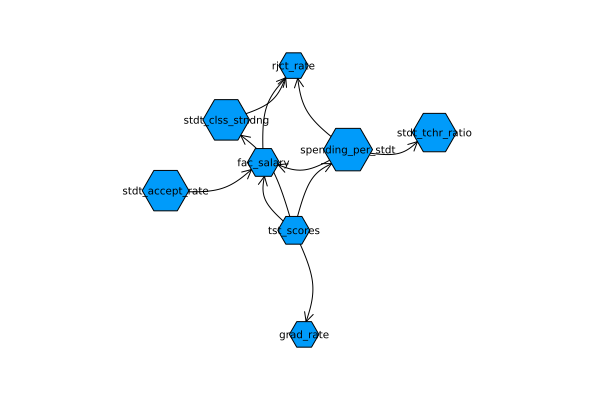

In [15]:
graphplot(est_g, names= names(df), nodesize=0.05)

In [11]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[170.21559110840948], [0.8700618240080485], [0.6042042372223143], [0.0009275634632550083, 0.264321499408281, 0.00017092360679294046], Float64[], Float64[], [0.0010911713014386665], [0.40137974386188446, 938.4473657356139, -122.36507460816392]])

In [16]:
scm= estimate_equations(df,est_g)

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[170.21559110840948], [0.8700618240080485], [0.6042042372223143], [0.0009275634632550083, 0.264321499408281, 0.00017092360679294046], Float64[], Float64[], [0.0010911713014386665], [0.40137974386188446, 938.4473657356139, -122.36507460816392]])

In [26]:
vars_scm = scm.variables
coefs_scm = scm.coefficients

for i in eachindex(vars_scm)

    #print(coefs_scm[i])
    if isempty(coefs_scm[i])
        println(vars_scm[i])
    end

end

tst_scores
stdt_accept_rate


In [5]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

# Create a DataFrame from the named tuple df
df = DataFrame(x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

println(estimate_equations(df, est_g))

┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


SCM(["x", "v", "w", "z", "s"], Vector{AbstractFloat}[[0.9367599207617366], [], [1.011743622979617], [0.9830732331777696, 1.005015339335607], [1.0051039852425676]])
